### Contents <a class="anchor" id="sections"></a>

- [Part 1. Getting Started](#section1)
- [Part 2. Data Cleaning](#section2)
- [Part 3. EDA](#section3)
- [Part 4. Count Vectorizing](#section4)
- [Part 5. Word Cloud](#section5)

### Part 1. Getting Started <a class="anchor" id="section1"></a>

In [1]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from datetime import datetime

sns.set()
sns.set(rc={'xtick.bottom': True, 'ytick.left': True})
pd.set_option('display.max_colwidth', None)
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Read CSV
df=pd.read_csv('topPostsMarch2022.csv')

In [3]:
# Isolate columns
df=df[['Title', 'URL']]
df.head(3)

,Title,URL
0,You have got to be kidding me 😭,https://www.reddit.com/r/MonsterLegends/comments/ss5u63/you_have_got_to_be_kidding_me/
1,'SLUMSTER & URIEL' WHO IS BETTER SUPPORT ?,https://www.reddit.com/r/MonsterLegends/comments/ssasqt/slumster_uriel_who_is_better_support/
2,It gonna be broken right?,https://www.reddit.com/r/MonsterLegends/comments/ssmna2/it_gonna_be_broken_right/


In [4]:
# Add column
df['Character Length'] = df['Title'].str.len()

# Add column
df['Word Count'] = df['Title'].apply(lambda x: len(x.split()))

# Organise column order
df=df[['Title', 'Character Length', 'Word Count', 'URL']]

df.head(3)

,Title,Character Length,Word Count,URL
0,You have got to be kidding me 😭,31,8,https://www.reddit.com/r/MonsterLegends/comments/ss5u63/you_have_got_to_be_kidding_me/
1,'SLUMSTER & URIEL' WHO IS BETTER SUPPORT ?,42,8,https://www.reddit.com/r/MonsterLegends/comments/ssasqt/slumster_uriel_who_is_better_support/
2,It gonna be broken right?,25,5,https://www.reddit.com/r/MonsterLegends/comments/ssmna2/it_gonna_be_broken_right/


In [5]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Character Length,100.0,45.28,35.393340,3.0,21.75,34.5,57.75,183.0
Word Count,100.0,9.13,6.948083,1.0,4.00,7.0,12.00,39.0


### Part 2. Data Cleaning <a class="anchor" id="section2"></a>

#### 2-1. Feature: Title

In [6]:
# Clean Title values
df['Title'] = [x.lower().replace('  ', '').replace(': )', ':)') for x in df['Title']]

In [7]:
# Identify short posts
df[df['Character Length'] <= 5]

,Title,Character Length,Word Count,URL
8,nice,4,1,https://www.reddit.com/r/MonsterLegends/comments/str4rs/nice/
80,:),3,2,https://www.reddit.com/r/MonsterLegends/comments/t8sa8v/_/


In [8]:
# All posts which contain a emoticon icon
df[(df['Title'].str.contains(':\)|:\('))]

,Title,Character Length,Word Count,URL
50,i'm on a quest to automatize everything i find tedious in this game :),70,14,https://www.reddit.com/r/MonsterLegends/comments/t3e0o3/im_on_a_quest_to_automatize_everything_i_find/
67,damn i liked the old art :(,27,7,https://www.reddit.com/r/MonsterLegends/comments/t67391/damn_i_liked_the_old_art/
80,:),3,2,https://www.reddit.com/r/MonsterLegends/comments/t8sa8v/_/
84,i got 2 of the special chests and only got legendaries :(,57,12,https://www.reddit.com/r/MonsterLegends/comments/t9663f/i_got_2_of_the_special_chests_and_only_got/


In [9]:
# Remove non-alphanumeric characters
df['Title'] = df['Title'].apply(lambda x: re.sub('[^ a-zA-Z0-9]','', x))

In [10]:
# All posts which contain a emoticon icon II
df[(df['Title'].str.contains(':\)|:\('))]

,Title,Character Length,Word Count,URL


In [11]:
# Reset column count
df['Character Length'] = df['Title'].str.len()

# Reset column count
df['Word Count'] = df['Title'].apply(lambda x: len(x.split()))

In [12]:
# Summary statistics II 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Character Length,100.0,43.89,34.776021,0.0,20.75,33.0,56.75,179.0
Word Count,100.0,8.99,6.950758,0.0,4.00,7.0,11.25,39.0


### Part 3. EDA <a class="anchor" id="section3"></a>

In [13]:
print(f"The average r/MonsterLegends post is: {round(df['Character Length'].mean())} characters.")

The average r/MonsterLegends post is: 44 characters.


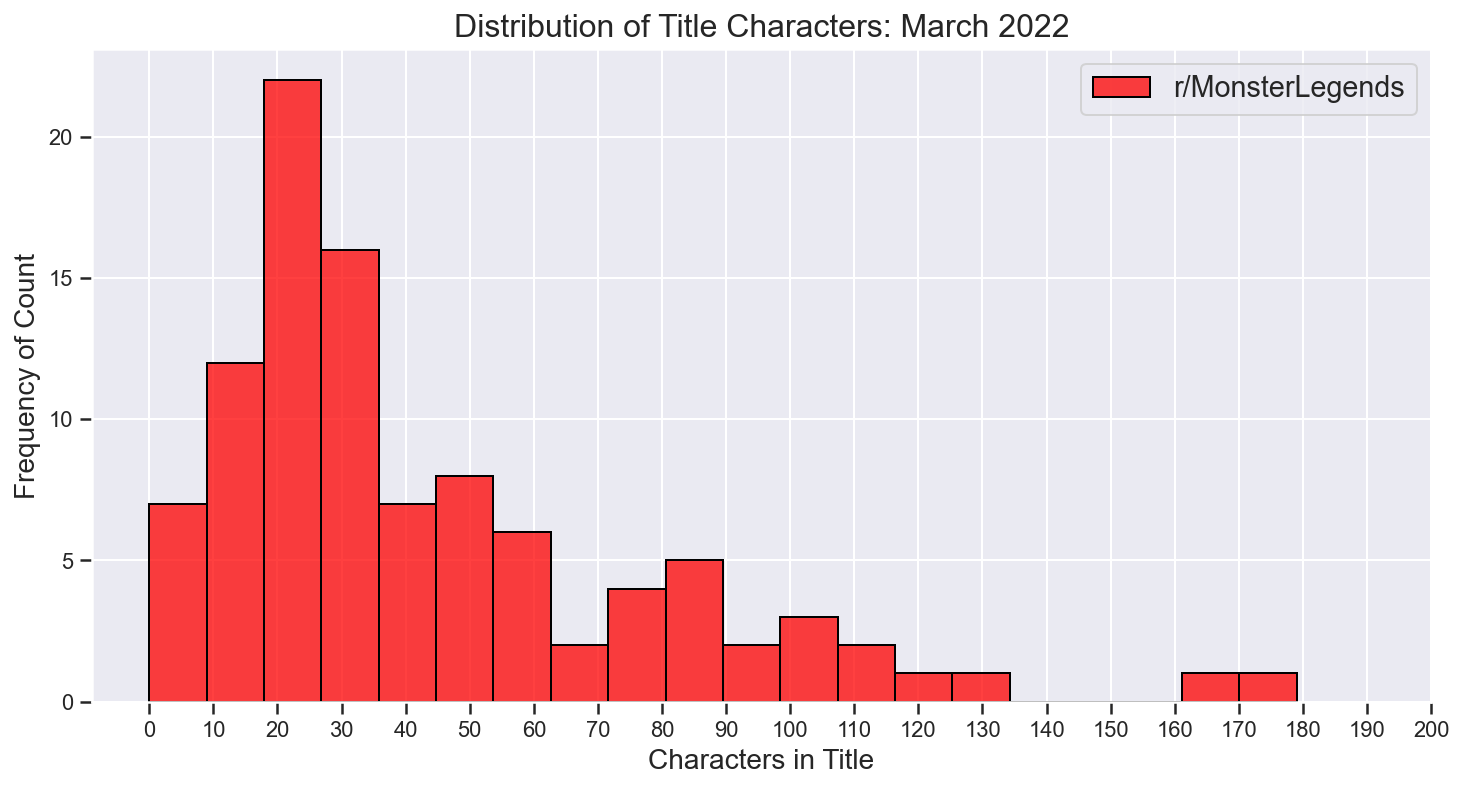

In [14]:
# Histogram
sns.histplot(df['Character Length'], bins=20, label='r/MonsterLegends', color='red', ec='black')
plt.title('Distribution of Title Characters: March 2022', size=16)
plt.xlabel('Characters in Title', size=14)
plt.xticks(range(0, 201, 10))
plt.ylabel('Frequency of Count', size=14)
plt.legend(fontsize='large')
plt.show()

In [15]:
print(f"The average r/MonsterLegends post contains: {round(df['Word Count'].mean())} words.")

The average r/MonsterLegends post contains: 9 words.


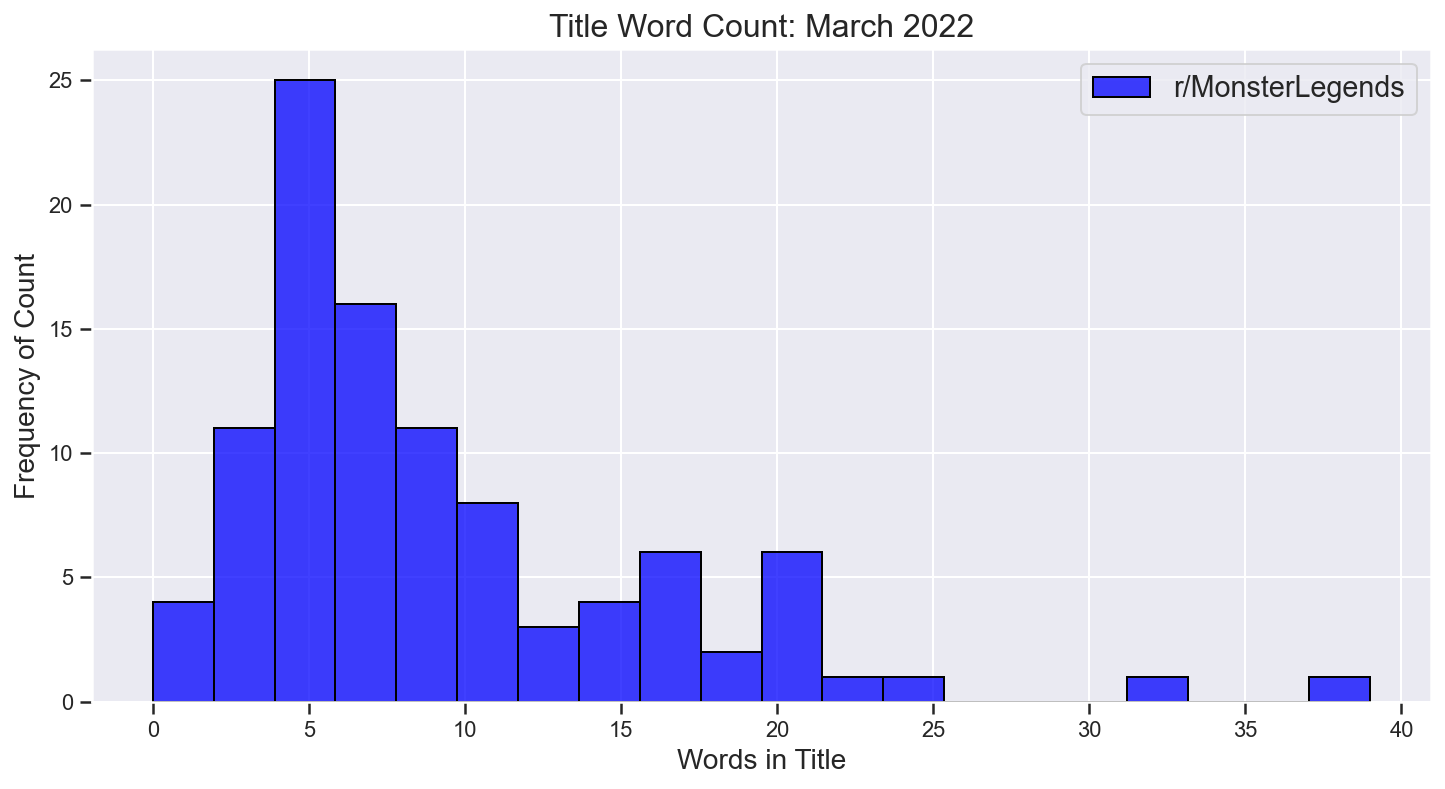

In [16]:
# Histogram 
sns.histplot(df['Word Count'], bins=20, label='r/MonsterLegends', color='blue', ec='black')
plt.title('Title Word Count: March 2022', size=16)
plt.xlabel('Words in Title', size=14)
plt.xticks(range(0, 41, 5))
plt.ylabel('Frequency of Count', size=14)
plt.legend(fontsize='large')
plt.show()

### Part 4. Count Vectorizing <a class="anchor" id="section4"></a>

In [17]:
# Instantiate PorterStemmer
stemmer = PorterStemmer()

In [18]:
# List to store stop words
stopWords = stopwords.words('english')

# List of the custom words 
customWords = ['game', 'games', 'gaming', 'new', 'how', 'get', 'ios', 'andoid', 'pvp', 'multiplayer']

# Extend stop words with custom words
stopWords.extend(customWords)

In [19]:
# Reference
df.head()

,Title,Character Length,Word Count,URL
0,you have got to be kidding me,30,7,https://www.reddit.com/r/MonsterLegends/comments/ss5u63/you_have_got_to_be_kidding_me/
1,slumster uriel who is better support,38,6,https://www.reddit.com/r/MonsterLegends/comments/ssasqt/slumster_uriel_who_is_better_support/
2,it gonna be broken right,24,5,https://www.reddit.com/r/MonsterLegends/comments/ssmna2/it_gonna_be_broken_right/
3,i make a dream cry,18,5,https://www.reddit.com/r/MonsterLegends/comments/stlopl/i_make_a_dream_cry/
4,been getting a few of these lately i should be lucky but i heard the current multiplayer monster is bad,103,20,https://www.reddit.com/r/MonsterLegends/comments/stmpsi/been_getting_a_few_of_these_lately_i_should_be/


In [20]:
# Remove stop words from DataFrame
df['Title'] = df['Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopWords]))

In [21]:
# Reference II
df.head()

,Title,Character Length,Word Count,URL
0,got kidding,30,7,https://www.reddit.com/r/MonsterLegends/comments/ss5u63/you_have_got_to_be_kidding_me/
1,slumster uriel better support,38,6,https://www.reddit.com/r/MonsterLegends/comments/ssasqt/slumster_uriel_who_is_better_support/
2,gonna broken right,24,5,https://www.reddit.com/r/MonsterLegends/comments/ssmna2/it_gonna_be_broken_right/
3,make dream cry,18,5,https://www.reddit.com/r/MonsterLegends/comments/stlopl/i_make_a_dream_cry/
4,getting lately lucky heard current monster bad,103,20,https://www.reddit.com/r/MonsterLegends/comments/stmpsi/been_getting_a_few_of_these_lately_i_should_be/


In [22]:
# Repeat the lambda function from above with stemmer
df['Title'] = df['Title'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [23]:
# Reference III
df.head()

,Title,Character Length,Word Count,URL
0,got kid,30,7,https://www.reddit.com/r/MonsterLegends/comments/ss5u63/you_have_got_to_be_kidding_me/
1,slumster uriel better support,38,6,https://www.reddit.com/r/MonsterLegends/comments/ssasqt/slumster_uriel_who_is_better_support/
2,gonna broken right,24,5,https://www.reddit.com/r/MonsterLegends/comments/ssmna2/it_gonna_be_broken_right/
3,make dream cri,18,5,https://www.reddit.com/r/MonsterLegends/comments/stlopl/i_make_a_dream_cry/
4,get late lucki heard current monster bad,103,20,https://www.reddit.com/r/MonsterLegends/comments/stmpsi/been_getting_a_few_of_these_lately_i_should_be/


In [24]:
# Instantiate CountVectorizer 
cvec = CountVectorizer(ngram_range=(1, 1))

# Fit/Transform each Title
cvecII = cvec.fit_transform(df['Title'])

# Create a new DataFrame
dfNew = pd.DataFrame(cvecII.toarray(), columns=cvec.get_feature_names_out())
 
# Top 10 most used words
dfNew.sum().sort_values(ascending=False).head(10)

monster    20
got        12
era         8
one         7
good        7
chest       7
first       6
like        6
team        5
make        4
dtype: int64

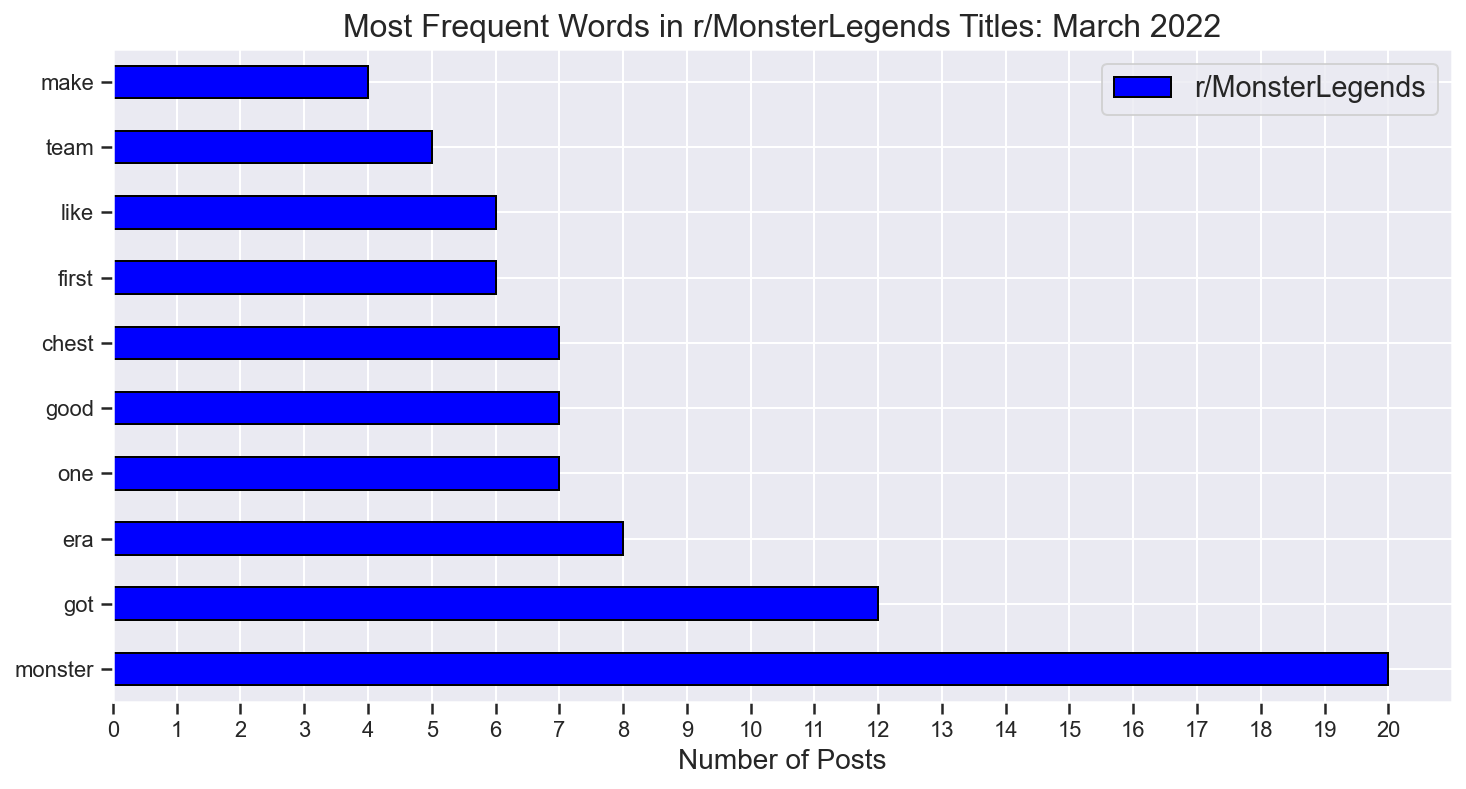

In [25]:
# Plot
dfNew.sum().sort_values(ascending=False).head(10).plot(kind='barh', color='blue', ec='black', label='r/MonsterLegends')
plt.title('Most Frequent Words in r/MonsterLegends Titles: March 2022', size=16)
plt.xlabel('Number of Posts', size=14)
plt.xticks(range(0, 21, 1))
plt.legend(fontsize='large')
plt.show()

### Part 5. Word Cloud <a class="anchor" id="section5"></a>

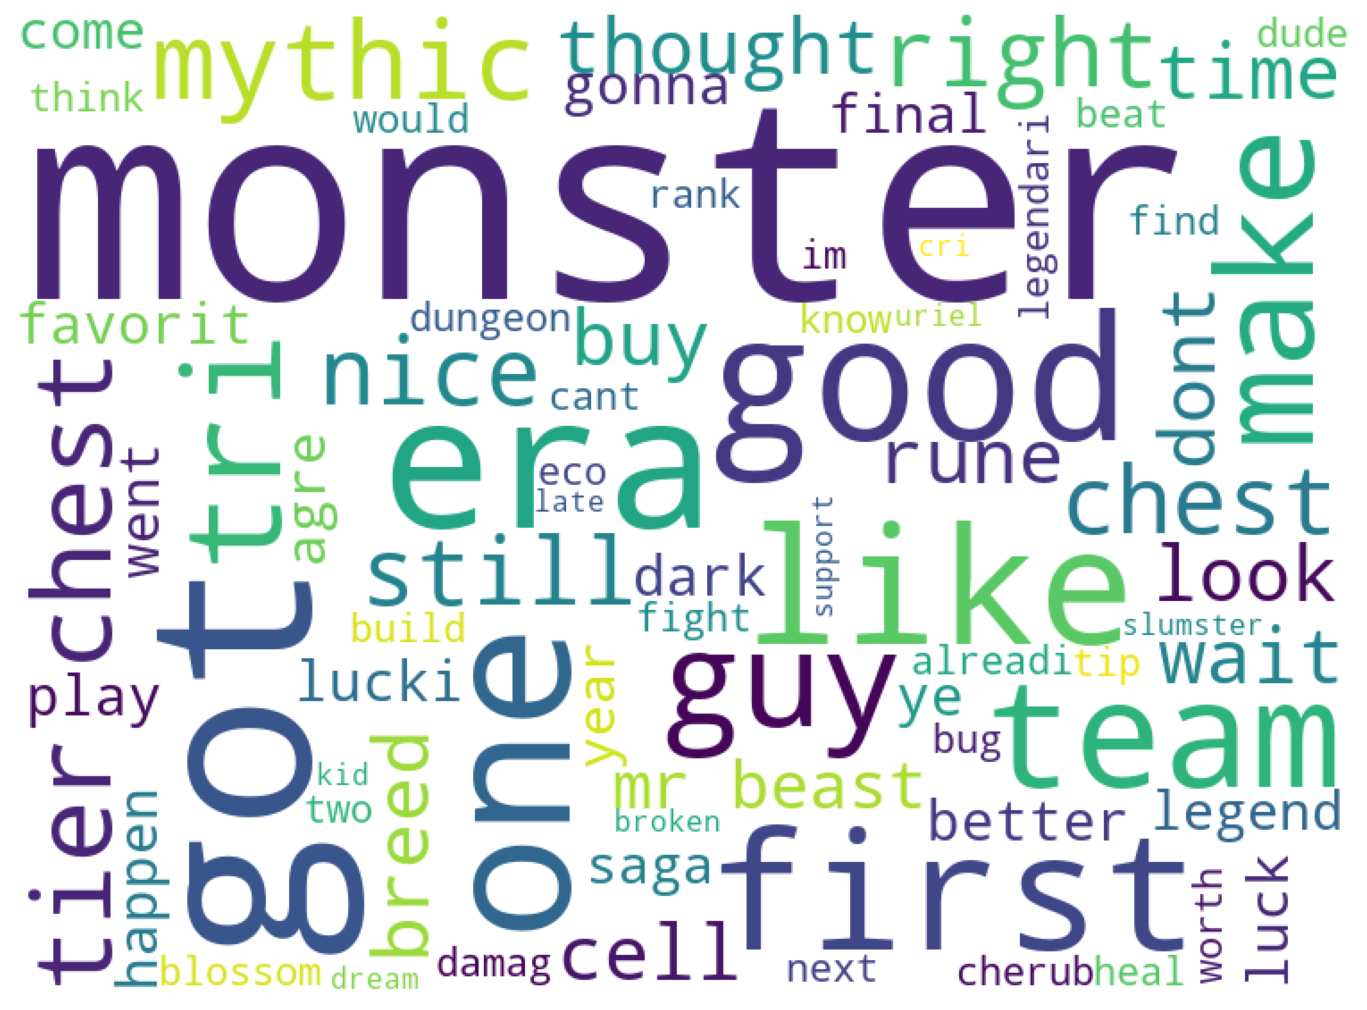

In [26]:
# WordCloud
from wordcloud import WordCloud
sns.set_theme(style="white", palette=None)

text= ' '

for title in df['Title']: 
    
    # Typecase each title to string 
    title = str(title) 
  
    # Split title string  
    titles = title.split() 
    
    for words in titles: 
        text = text + words + ' '

wc = WordCloud(max_words=75, width = 750, height = 550,
               background_color ='white', contour_width=3, 
               contour_color='Set3', stopwords=stopWords, 
               min_font_size=8).generate(text)

# Plot WordCloud image                        
plt.figure(figsize = (12, 10)) 
plt.axis('off')
plt.imshow(wc) 

# Save
plt.savefig('March2022.png', format='png')
plt.show()

[Return to contents](#sections)